# Histogram Demo

## Building from the scatter demo

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec

%matplotlib inline

## Read in the data

*I'm using pandas*

In [2]:
c90 = pd.read_csv('congress90.csv')
c90

,name,x,alt
0,JOHNSON,-0.337,-0.035
1,EDWARDS J.,0.177,0.161
2,DICKINSON,0.398,-0.057
3,ANDREWS G.,-0.030,1.000
4,NICHOLS,-0.042,0.872
...,...,...,...
533,BYRD R.,-0.309,0.729
534,PROXMIRE,-0.598,0.801
535,NELSON,-0.567,0.198
536,HANSEN,0.489,-0.036


### We'll make a heatmap, and also histograms

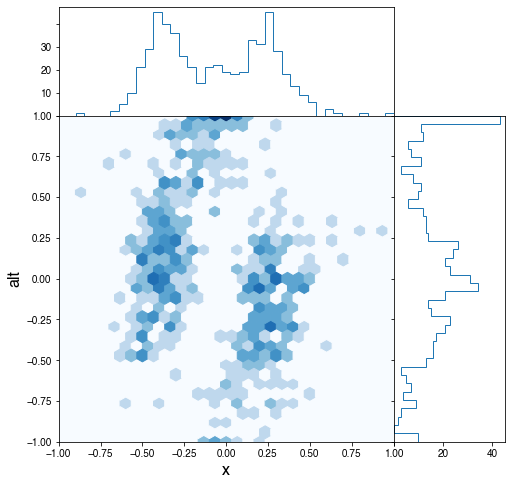

In [3]:
from matplotlib import gridspec


f = plt.figure(figsize=(8, 8)) 
gs = gridspec.GridSpec(2, 2, height_ratios = [1, 3], width_ratios = [3, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])

#histograms
Nx = Ny = 40
xmin = ymin = -1.
xmax = ymax = 1.
xbins = np.linspace(xmin, xmax, Nx)
ybins = np.linspace(ymin, ymax, Ny)
hx1D, x1D, im = ax1.hist(c90['x'], bins=xbins, histtype='step', fill=False)
hy1D, y1D, im = ax3.hist(c90['alt'], bins=ybins, histtype='step', fill=False, orientation="horizontal")

#heatmap
ax2.hexbin(c90['x'], c90['alt'], gridsize=30, cmap=cm.Blues, bins='log', extent=(xmin, xmax, ymin, ymax))
#ax2.hist2d(c90['x'], c90['alt'], bins=[Nx, Ny], range=[[xmin, xmax], [ymin, ymax]], cmap = cm.Blues)

ax1.set_xlim(xmin, xmax)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax3.set_ylim(ymin, ymax)
ax2.set_xlabel('x', fontsize=16)
ax2.set_ylabel('alt', fontsize=16)
plt.setp(ax1.get_yticklabels()[0], visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels()[0], visible=False)
f.subplots_adjust(hspace=0., wspace=0.)

f.savefig('hist.pdf',format='pdf', bbox_inches = 'tight') 
